## Project Brief
**Situation:**
I am a LEGO collector and I am searching for my next set.

**Assignment:**
Build a interactive user interface to help select my next LEGO project. It needs to factor in the following features:
- Price
- Age range
- Number of pieces
- Set theme

**Objective**
1. Load and prepare data for analysis
2. Design layout and visuals
3. Add interactive components

### Dataset
We will use LEGO sets released from 1970 to 2022

In [1]:
import pandas as pd

In [2]:
lego_data = pd.read_excel(r"C:\Users\isaac\OneDrive\Documents\LEGO SETS DATA PROJECT\lego_sets.xlsx")
lego_data.head()

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
0,2025-08-01 00:00:00,Small house set,1970,Minitalia,NaN,Vintage,Normal,67.0,NaN,NaN,NaN,https://brickset.com/sets/1-8,https://images.brickset.com/sets/small/1-8.jpg,https://images.brickset.com/sets/images/1-8.jpg
1,2025-08-02 00:00:00,Medium house set,1970,Minitalia,NaN,Vintage,Normal,109.0,NaN,NaN,NaN,https://brickset.com/sets/2-8,https://images.brickset.com/sets/small/2-8.jpg,https://images.brickset.com/sets/images/2-8.jpg
2,2025-06-03 00:00:00,Medium house set,1970,Minitalia,NaN,Vintage,Normal,158.0,NaN,NaN,NaN,https://brickset.com/sets/3-6,https://images.brickset.com/sets/small/3-6.jpg,https://images.brickset.com/sets/images/3-6.jpg
3,2025-04-04 00:00:00,Large house set,1970,Minitalia,NaN,Vintage,Normal,233.0,NaN,NaN,NaN,https://brickset.com/sets/4-4,https://images.brickset.com/sets/small/4-4.jpg,https://images.brickset.com/sets/images/4-4.jpg
4,2025-06-04 00:00:00,Mini House and Vehicles,1970,Samsonite,Model Maker,Vintage,Normal,NaN,NaN,NaN,NaN,https://brickset.com/sets/4-6,NaN,NaN


### Check datatypes and general statistics

In [3]:
lego_data.dtypes

set_id             object
name               object
year                int64
theme              object
subtheme           object
themeGroup         object
category           object
pieces            float64
minifigs          float64
agerange_min      float64
US_retailPrice    float64
bricksetURL        object
thumbnailURL       object
imageURL           object
dtype: object

In [4]:
lego_data.describe(include = "all")

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
count,18457,18457,18457.000000,18457,14901,18455,18457,14533.000000,8399.000000,6787.000000,6982.000000,18457,17451,17451
unique,18457,15374,NaN,154,895,16,7,NaN,NaN,NaN,NaN,18457,17422,17422
top,2025-08-01 00:00:00,Bonus/Value Pack,NaN,Gear,Magazine Gift,Miscellaneous,Normal,NaN,NaN,NaN,NaN,https://brickset.com/sets/1-8,https://images.brickset.com/sets/small/30324-1...,https://images.brickset.com/sets/images/30324-...
freq,1,165,NaN,2832,453,5891,12757,NaN,NaN,NaN,NaN,1,5,5
mean,NaN,NaN,2007.960611,NaN,NaN,NaN,NaN,226.473749,2.663650,6.637542,37.534817,NaN,NaN,NaN
std,NaN,NaN,11.948666,NaN,NaN,NaN,NaN,469.988785,2.897857,2.780091,54.382712,NaN,NaN,NaN
min,NaN,NaN,1970.000000,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,1.490000,NaN,NaN,NaN
25%,NaN,NaN,2001.000000,NaN,NaN,NaN,NaN,23.000000,1.000000,5.000000,9.990000,NaN,NaN,NaN
50%,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,70.000000,2.000000,6.000000,19.990000,NaN,NaN,NaN
75%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,242.000000,3.000000,8.000000,39.990000,NaN,NaN,NaN


In [5]:
#Checking for null values
lego_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   set_id          18457 non-null  object 
 1   name            18457 non-null  object 
 2   year            18457 non-null  int64  
 3   theme           18457 non-null  object 
 4   subtheme        14901 non-null  object 
 5   themeGroup      18455 non-null  object 
 6   category        18457 non-null  object 
 7   pieces          14533 non-null  float64
 8   minifigs        8399 non-null   float64
 9   agerange_min    6787 non-null   float64
 10  US_retailPrice  6982 non-null   float64
 11  bricksetURL     18457 non-null  object 
 12  thumbnailURL    17451 non-null  object 
 13  imageURL        17451 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


In [6]:
lego_data.isnull().sum(axis = 0)

set_id                0
name                  0
year                  0
theme                 0
subtheme           3556
themeGroup            2
category              0
pieces             3924
minifigs          10058
agerange_min      11670
US_retailPrice    11475
bricksetURL           0
thumbnailURL       1006
imageURL           1006
dtype: int64

### We can see from above that there are null values in the subtheme, themegroup, pieces, age, and prices columns. The next step is to clean the data by removing the rows with null values.

## Objective 1: Load and Prepare Data
I will be using Power BI to:
- remove minifigs, bricksetURL, and thumbnailURL fields
- review header names and data types for accuracy
- filter out records that have null values in price, age, number of pieces or image URL
- profile the data: How many LEGO sets are represented? What's the price range?
- create additional columns named 'Age Range' and ' Price Range'
- add DAX (Data Analysis Expressions measures)


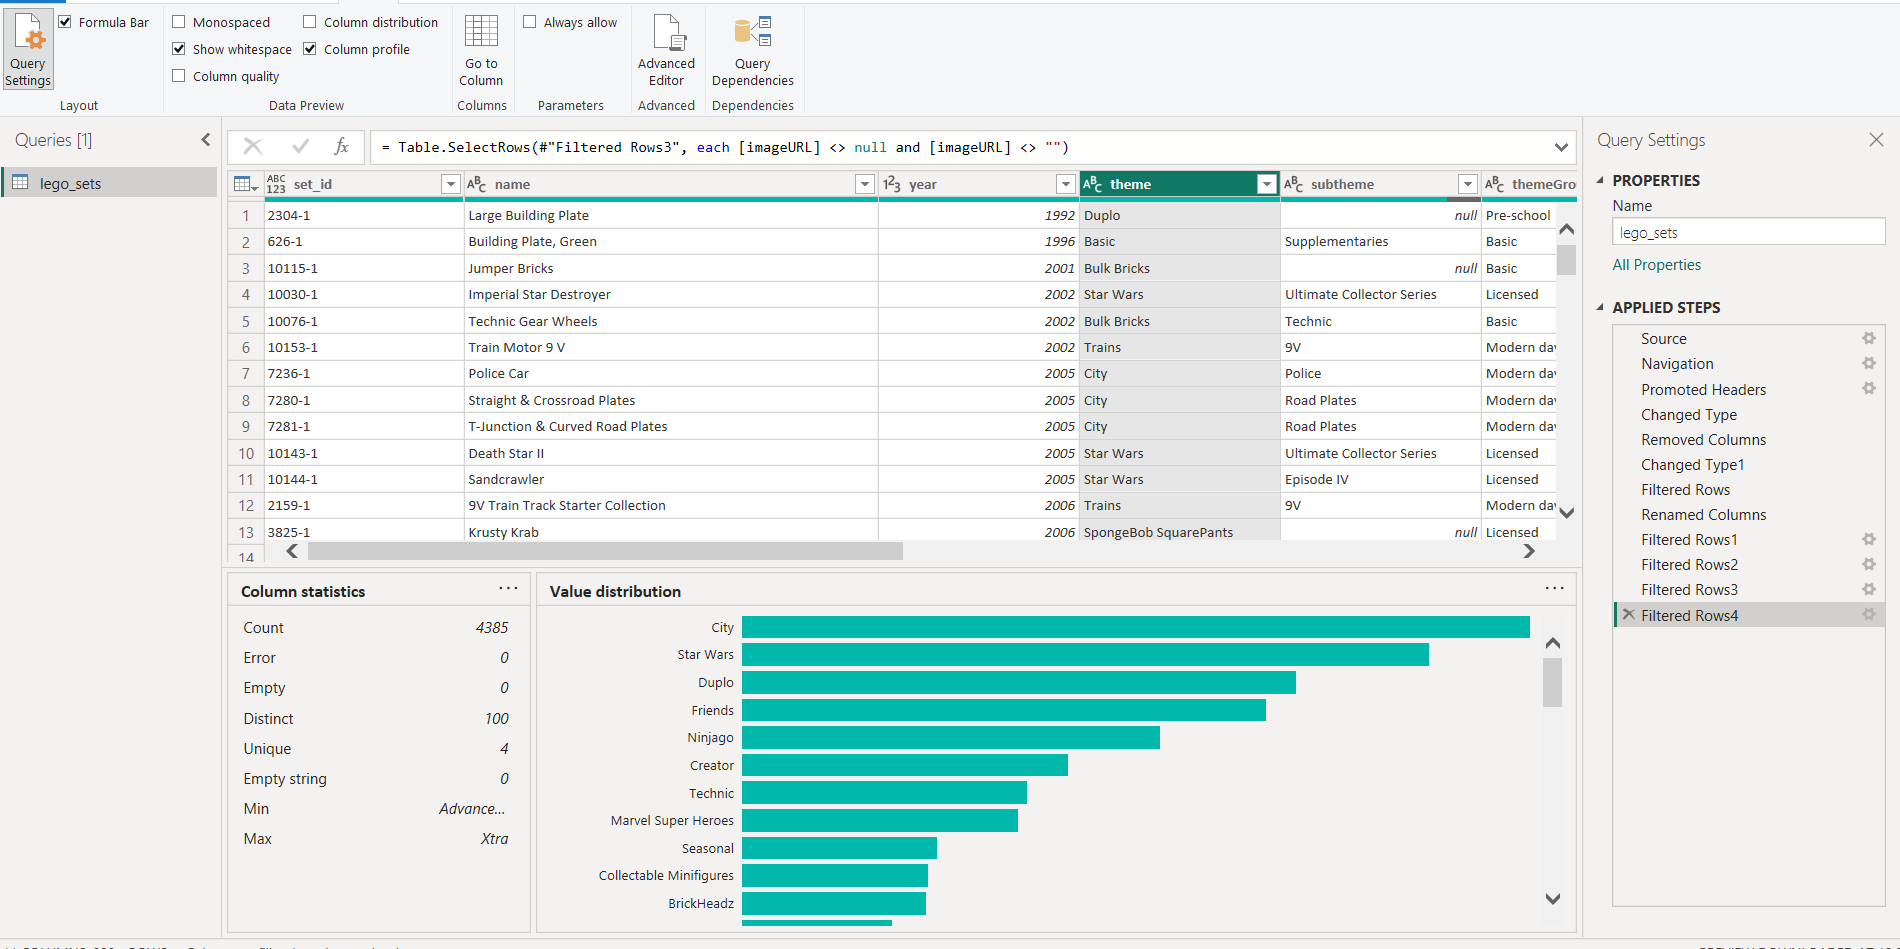


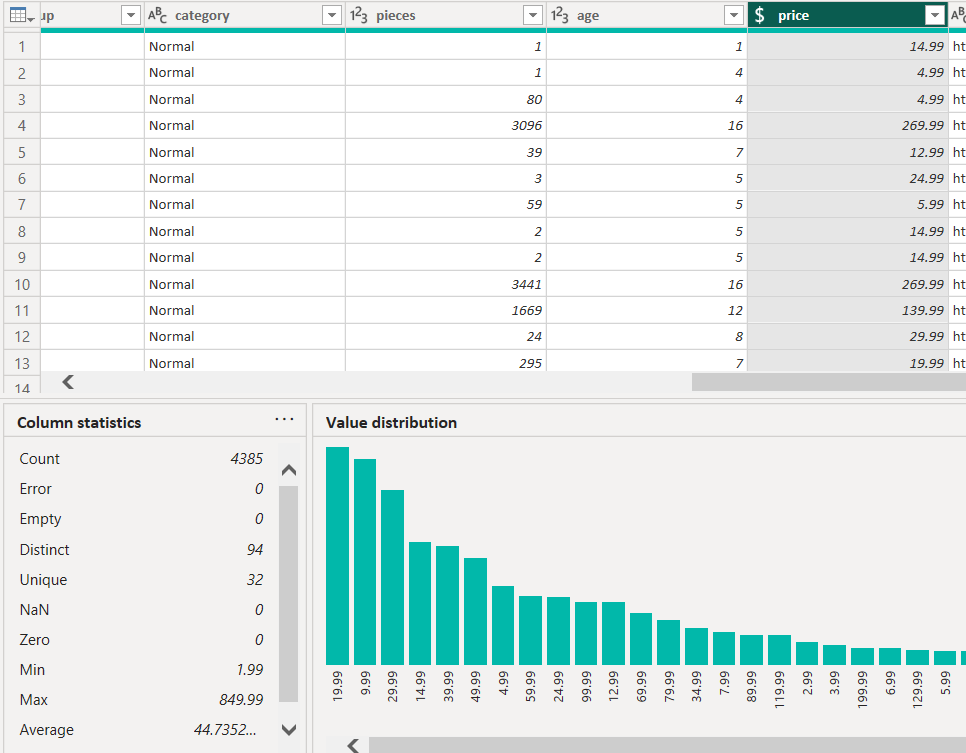
vvv

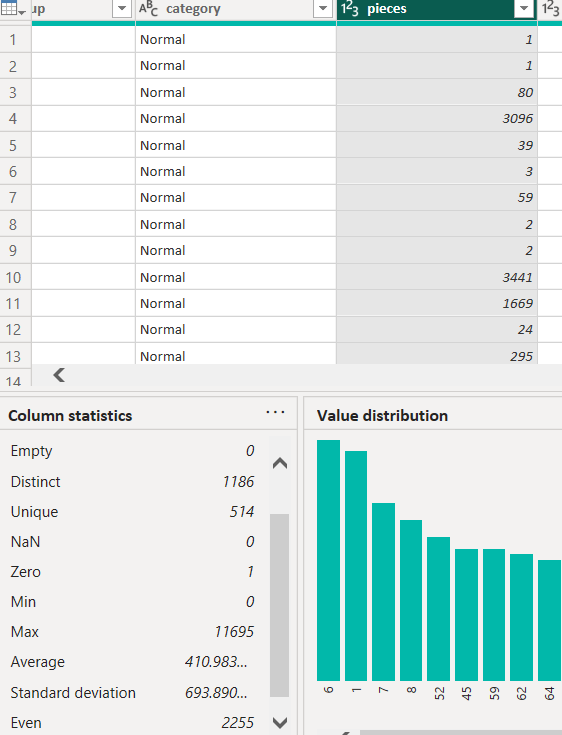

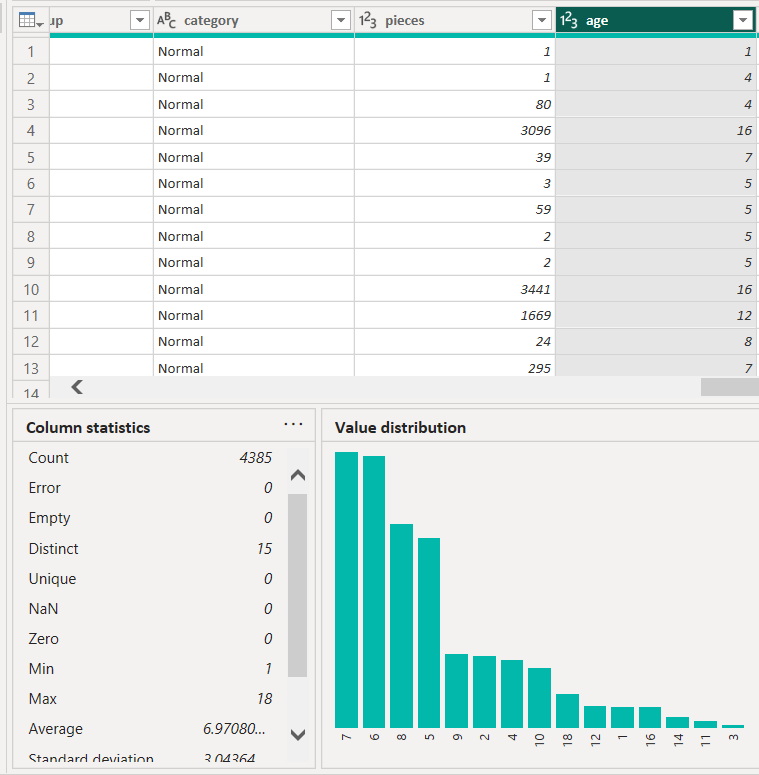

## Quick profiling
From the above screenshots we gather that:
- total of 4385 LEGO sets
- 100 distinct sets
- age range 1-18 
- average age ~7
- price range 1.99 - 849.99 USD
- average price ~44.74 USD
- pieces range 0 - 11695
- average pieces ~441

## Adding Conditional Columns
We will now bucket the age and price columns and add two more columns called 'Age Range' and 'Price Range' using if and else if statements:

**Age Range**
- Over 18
- 10 to 17
- 5 to 9
- 1 to 4

**Price Range**
- GREATER THAN 500 '£££££'
- GREATER THAN 100 '££££'
- GREATER THAN 50 '£££'
- GREATER THAN 25 '££'
- otherwise '£'

## DAX measures
We will include additional information about our dataset:
- average price
- average pieces
- average age
- distinct theme groups
- distinct sets

This will be done by creating a measures table



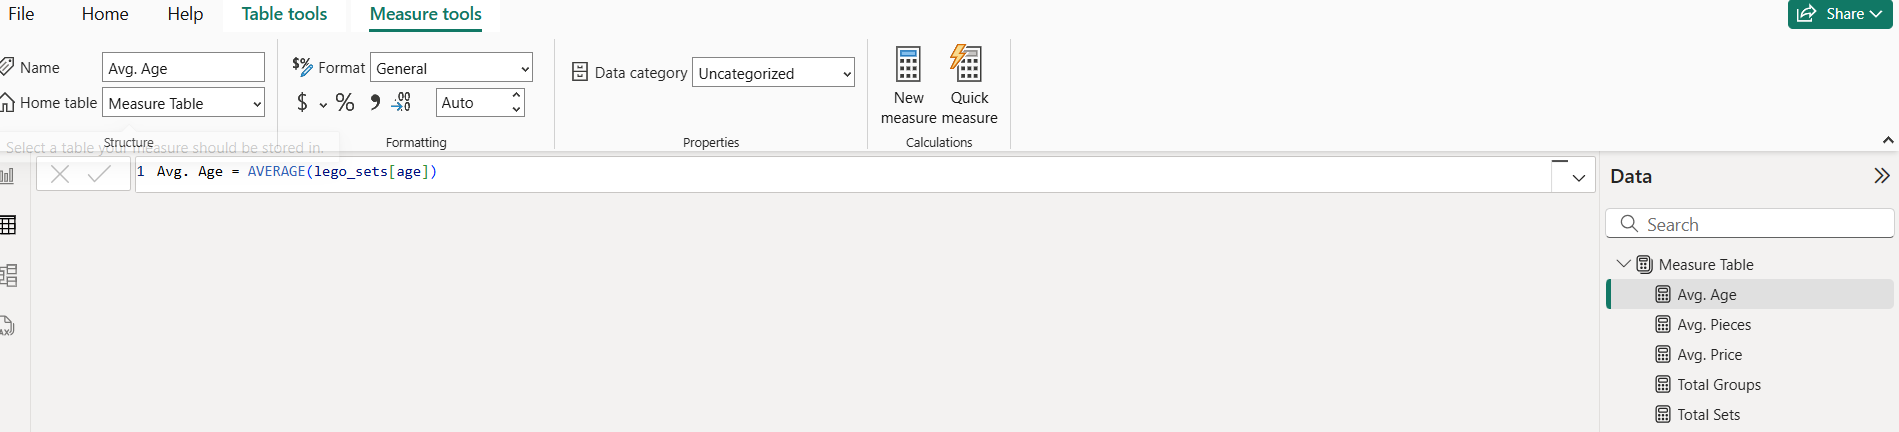

## Objective 2: Design Layout and visuals

Drafting a sketch is an crucial part of the design process as it allows you to build a visual skeleton with the important stats in mind such as avg. price, avg. pieces, total sets. Include filters, viewing list for all the LEGO sets that meet the criteria, and a visual card that contain the important features and thumbnail image of an individual LEGO set.

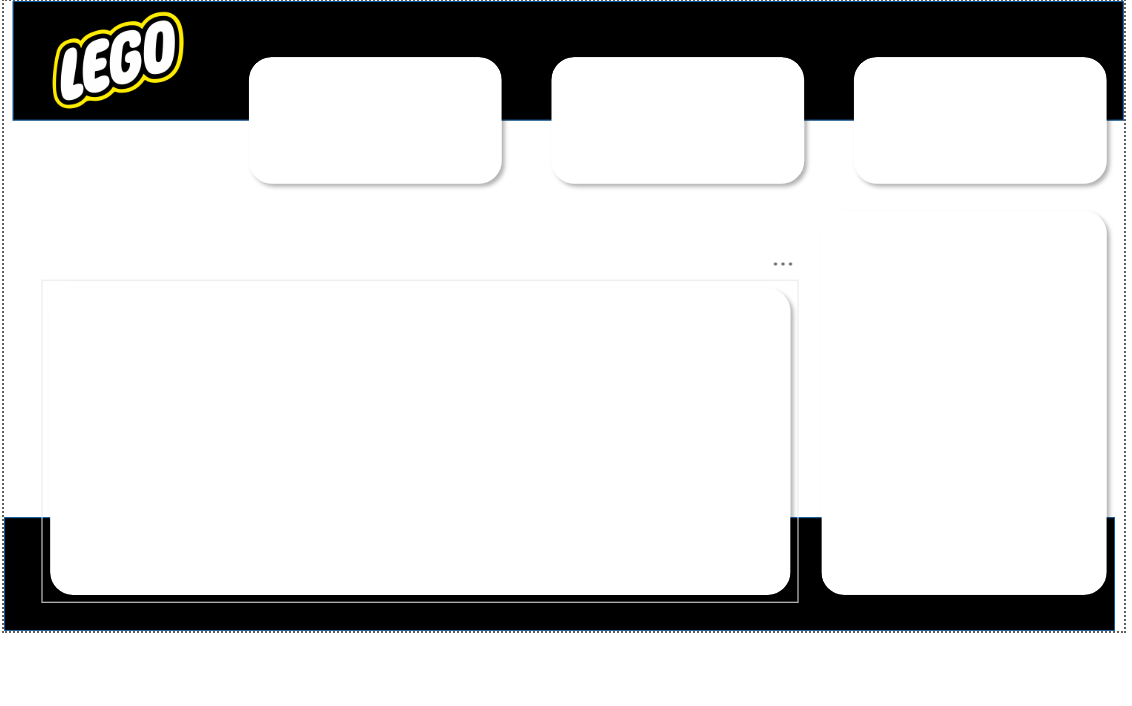

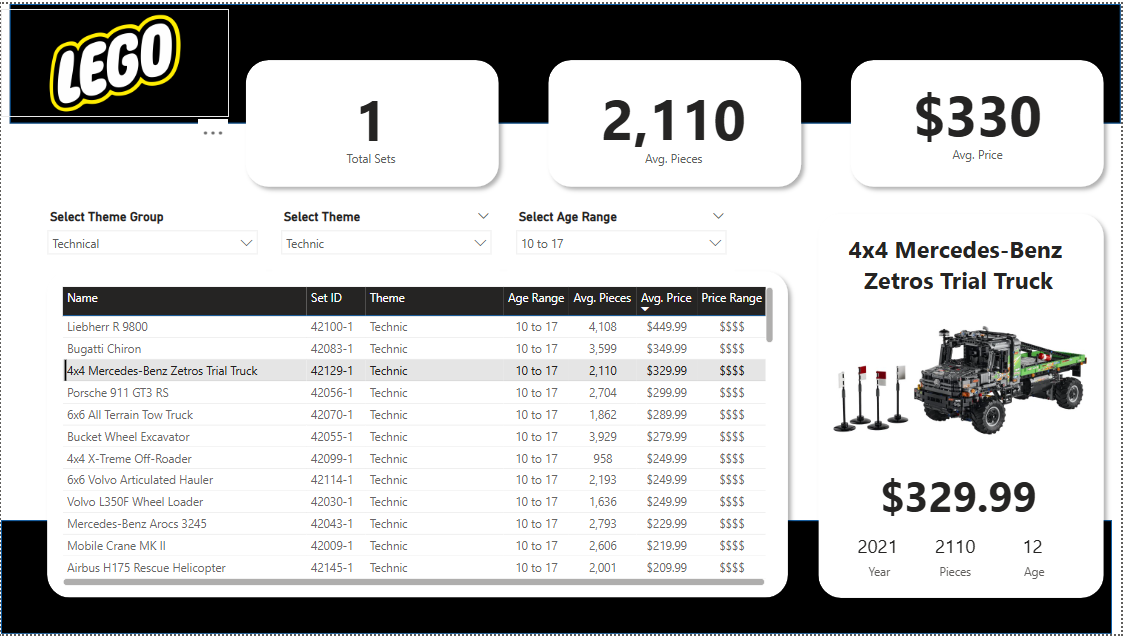

## Objective 3: Adding Interactive Components
- Add a numeric range parameter (max price) ranging from 0 - 850 and incrementing by 5
- Enable tooltips on the table to display the image of each LEGO set on hover
- Use bookmarks and button actions to allow users to reset all filters on the page
- Duplicate the page and replace visuals with a decomposition tree, configure to analyse total sets by category, theme group, theme, and name

To create the max price slider parameter go to :
Modeling > New parameter > Numeric Range 
then add our desired parameters from above.

We then want the table to only show LEGO sets that are under the price of the selected Max Price. Add a new DAX measure to our Measure Table:
Max Price Filter = IF([Avg. Price]<='Max Price'[Max Price Value],1,0)
then apply this as a filter to the table visual

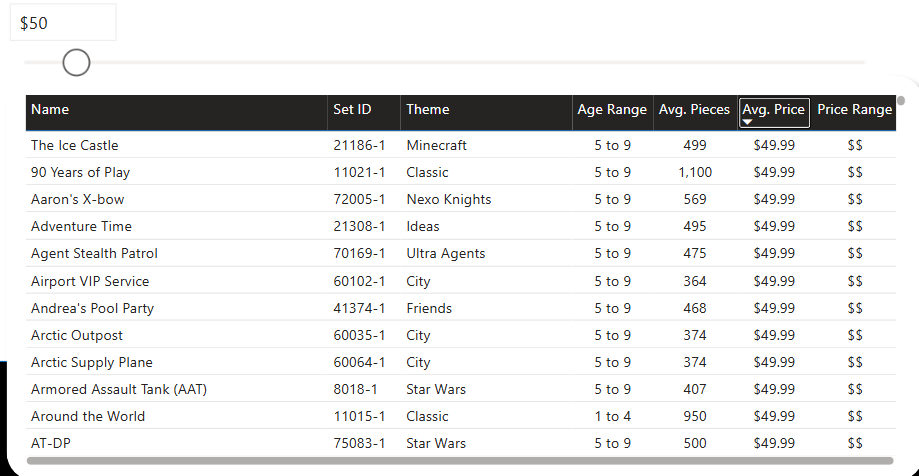

Next we want to add a hover feature to display the thumbnail imae of each LEGO set. To do this we want to enable tooltips on our table visual. 

First create a new report tab:
Format page > Page information > allow use as tooltip
then insert an image visual and add the imageURL.

Turn on Tooltips on the table visual. In options we want type as report page and the page to be the newly created Thumbnail tab.


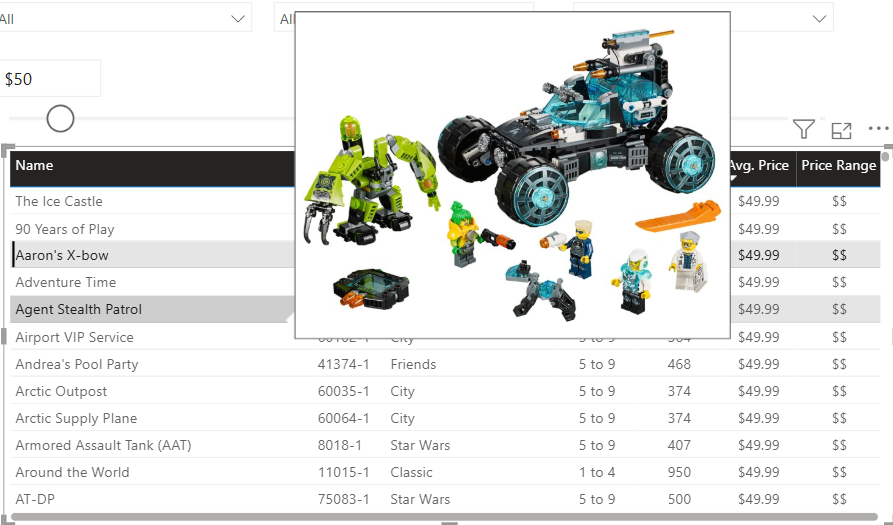

Now we are going to add a reset button:
Insert > Buttons > Blank
We are going to name this button Reset Filters add a hover and press action so that the background goes from light to dark grey and the text from black to white.
Format button > Style

We are then going to apply this button to the filters and table.
To do that we first need to create a bookmark called Unfiltered. Add thos bookmark to the button:
Format Button > Action > Type : bookmark > select bookmark : unfiltered

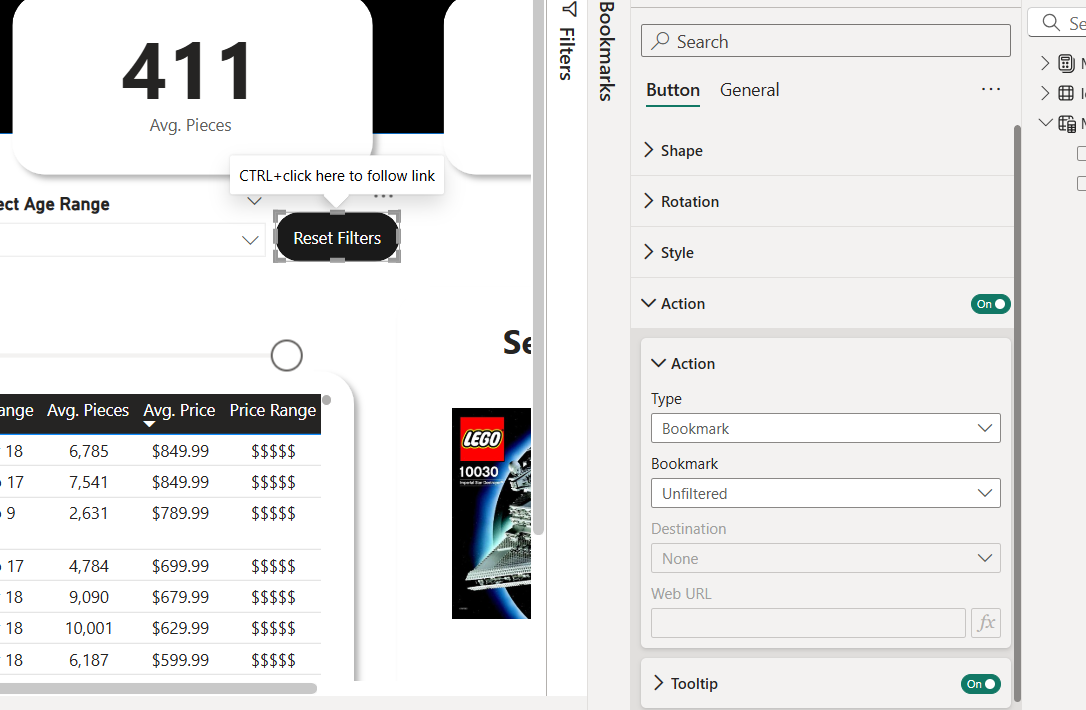


Finally we will create another report tab that will display a decomposition tree to analyse the total sets by category, theme group, theme, and name.
We will also add a buttons to allow the user easy navigation between the two report tabs.

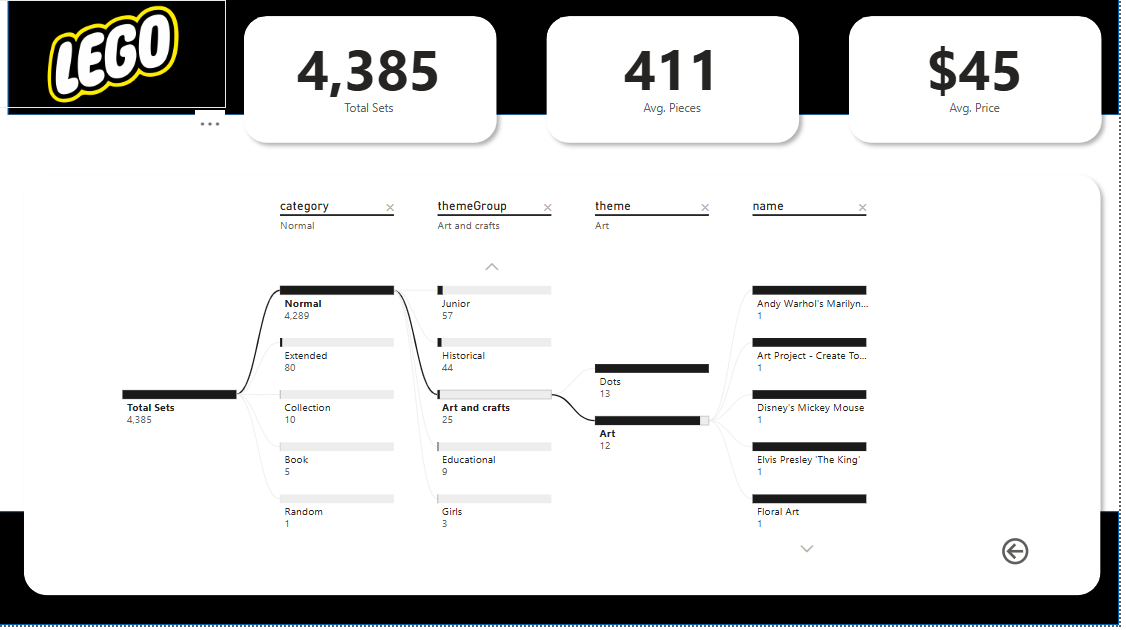

# Completed! 
# Thank you :) hope you find this useful for your next LEGO Set Project